In [1]:
import pyco2stats as PyCO2
import numpy as np

# my synthetic sample
my_means = np.array([0.7, 2])
my_stds = np.array([0.6, 0.4])
my_weights = np.array([0.4, 0.6])

my_sample = PyCO2.GMM.sample_from_gmm(n_samples= 500, means=my_means, 
                                     stds=my_stds, weights=my_weights, random_state=42)

# number of components
n_comp = 2

# Fit GMM using EM algorithm
EM_mu, EM_std, EM_w, EM_ll = PyCO2.GMM.gaussian_mixture_em(my_sample, n_comp)

# Fit GMM using EM algorithm implemented using scikit-learn (skEM))
skEM_mu, skEM_std, skEM_w, skEM_ll = PyCO2.GMM.gaussian_mixture_sklearn(my_sample, n_comp)

# Fit GMM using the constrained Gradient Descent (cGD) algorithm
mean_bounds = [(-0.5, 1.5), (1, 3)]
std_bounds = [(0.1, 2.5), (0.1, 2.5)]

cGD_mu, cGD_std, cGD_w = PyCO2.GMM.constrained_gaussian_mixture(my_sample, mean_bounds, 
                                                                 std_bounds, n_comp, verbose=False)
    

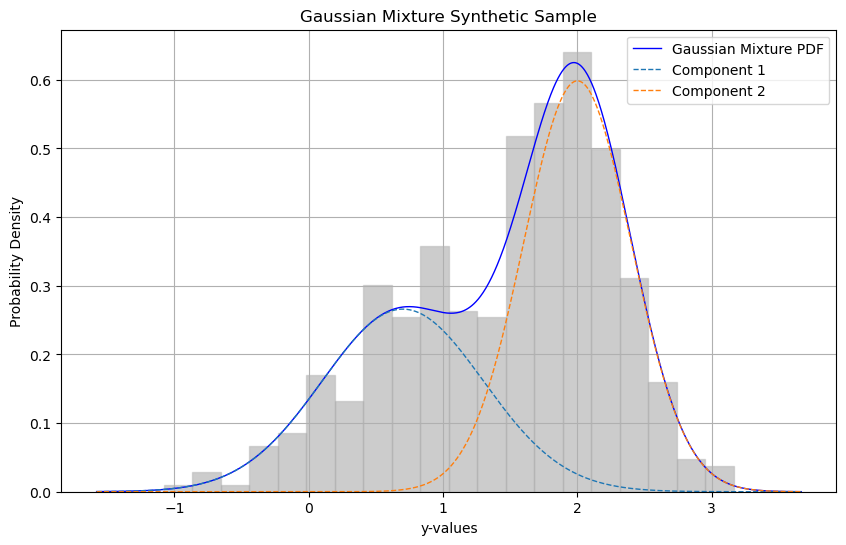

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size

pdf_plot_kwargs = {'color': 'blue', 'linewidth': 1}
component_plot_kwargs = {'linestyle': '--', 'linewidth': 1}
hist_plot_kwargs = {'alpha': 0.4, 'color': 'gray', 'edgecolor': 'darkgray'}

x_values = np.linspace(min(my_sample) - 0.5, max(my_sample) + 0.5, 1000).reshape(-1, 1)

PyCO2.Visualize_Mpl.plot_gmm_pdf(ax, x_values, my_means, my_stds, my_weights, data=my_sample,
             pdf_plot_kwargs=pdf_plot_kwargs,
             component_plot_kwargs=component_plot_kwargs,
             hist_plot_kwargs=hist_plot_kwargs)


ax.set_title('Gaussian Mixture Synthetic Sample')
ax.set_xlabel('y-values')
ax.set_ylabel('Probability Density')
ax.grid()
ax.legend()
plt.show()

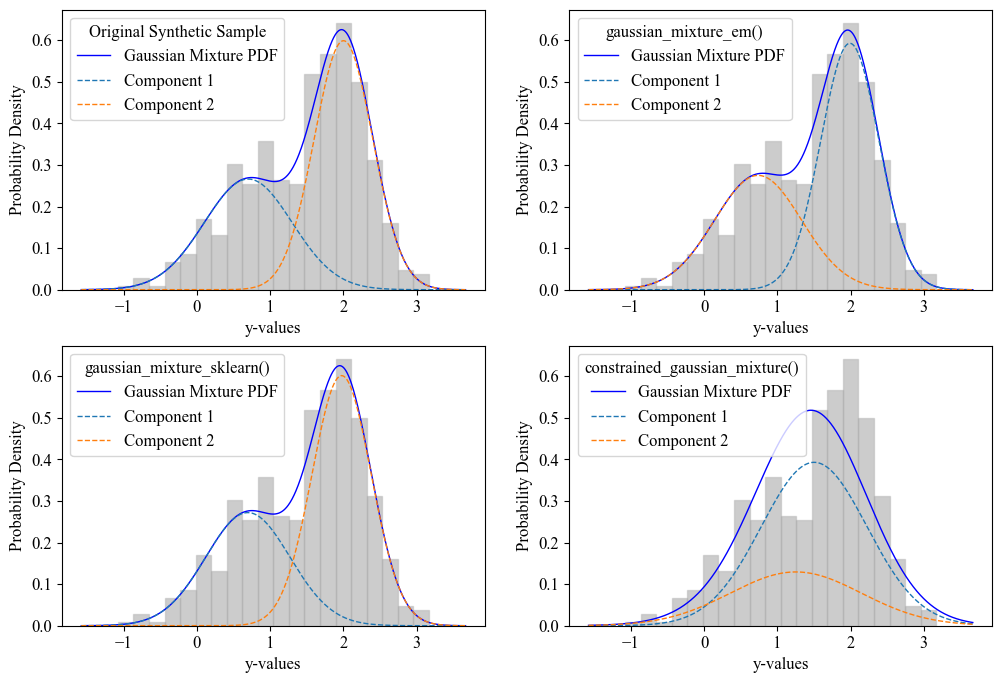

In [3]:
fig = plt.figure(figsize=(12, 8))  # Increase figure size
plt.rcParams['font.family'] = ['Times New Roman'] 
plt.rcParams['font.size'] = 12

ax1 = fig.add_subplot(2,2,1)
PyCO2.Visualize_Mpl.plot_gmm_pdf(ax1, x_values, my_means, my_stds, my_weights, data=my_sample,
             pdf_plot_kwargs=pdf_plot_kwargs,
             component_plot_kwargs=component_plot_kwargs,
             hist_plot_kwargs=hist_plot_kwargs)
ax1.legend(title='Original Synthetic Sample')
ax1.set_xlabel('y-values')
ax1.set_ylabel('Probability Density')

ax2 = fig.add_subplot(2,2,2)
PyCO2.Visualize_Mpl.plot_gmm_pdf(ax2, x_values,EM_mu, EM_std, EM_w, data=my_sample,
             pdf_plot_kwargs=pdf_plot_kwargs,
             component_plot_kwargs=component_plot_kwargs,
             hist_plot_kwargs=hist_plot_kwargs)
ax2.legend(title='gaussian_mixture_em()')
ax2.set_xlabel('y-values')
ax2.set_ylabel('Probability Density')

ax3 = fig.add_subplot(2,2,3)
PyCO2.Visualize_Mpl.plot_gmm_pdf(ax3, x_values, skEM_mu, skEM_std, skEM_w, data=my_sample,
             pdf_plot_kwargs=pdf_plot_kwargs,
             component_plot_kwargs=component_plot_kwargs,
             hist_plot_kwargs=hist_plot_kwargs)
ax3.legend(title='gaussian_mixture_sklearn()')
ax3.set_xlabel('y-values')
ax3.set_ylabel('Probability Density')

ax4 = fig.add_subplot(2,2,4)
PyCO2.Visualize_Mpl.plot_gmm_pdf(ax4, x_values, cGD_mu, cGD_std, cGD_w, data=my_sample,
             pdf_plot_kwargs=pdf_plot_kwargs,
             component_plot_kwargs=component_plot_kwargs,
             hist_plot_kwargs=hist_plot_kwargs)
ax4.legend(title='constrained_gaussian_mixture()')
ax4.set_xlabel('y-values')
ax4.set_ylabel('Probability Density')
plt.savefig("GMM.png", dpi=300)
